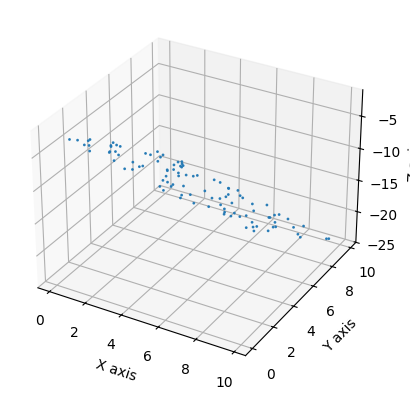

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
def data(N=100, a=2, b=5,c=3,d=4, noise_sigma=0.01):
    x = np.random.uniform(0, 10, N)
    y = np.random.uniform(0, 10, N)
    noise = np.random.normal(0, noise_sigma, N)
    z = -(a*x + b*y + d + noise) / c
    return np.vstack((x, y, z))

points = data(N=100)
def plot_points(points, alpha=0.9):
    x, y, z = points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, s=1, alpha=alpha)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.show()

plot_points(points)

Fitted plane: 0.32x + 0.81y + 0.49z + 0.65 = 0


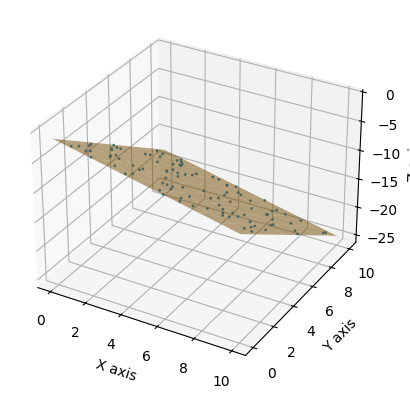

In [ ]:
def fit_plane(points):
    ctr = points.mean(axis=1)
    Q = points - ctr[:, np.newaxis]
    M = Q @ Q.T
    _, _, Vt = np.linalg.svd(M)
    normal = Vt[-1, :]
    a, b, c = normal
    d = -normal @ ctr
    return a, b, c, d

a, b, c, d = fit_plane(points)
print(f"Fitted plane: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

def plot_fitted_plane(points, a, b, c, d, alpha=0.5):
    x, y, z = points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, s=1, alpha=0.9)

    xx, yy = np.meshgrid(np.linspace(0, 10, 10), np.linspace(0, 10, 10))
    zz = -(a * xx + b * yy + d) / c
    ax.plot_surface(xx, yy, zz, alpha=alpha, color='orange')
    
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.show()

plot_fitted_plane(points, a, b, c, d)